In [2]:
!pip install cdt
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pickle
import cdt
import networkx as nx
import matplotlib.pyplot as plt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [4]:
!apt-get install python-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'python-dev-is-python2' instead of 'python-dev'
pkg-config is already the newest version (0.29.1-0ubuntu4).
graphviz is already the newest version (2.42.2-3build2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libpython2-dev libpython2-stdlib libpython2.7
  libpython2.7-dev libxdot4 python-is-python2 python2 python2-dev
  python2-minimal python2.7-dev
Suggested packages:
  gvfs python2-doc python-tk
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libpython2-dev libpython2-stdlib
  libpython2.7 libpython2.7-dev libxdot4 python-dev-is-python2
  python-is-python2 python2 python2-dev python2-minimal python2.7-dev
0 upgraded, 18 newly installed, 0 to remove and 24 not upgraded.


In [5]:
from IPython.display import Image, display

In [6]:
user = "PouyaKhn"
repo = "causal"
src_dir = "causal_discovery"
pyfile = "df_causal_inference.p"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url}

--2023-05-08 00:31:52--  https://raw.githubusercontent.com/PouyaKhn/causal/main/causal_discovery/df_causal_inference.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584841 (571K) [application/octet-stream]
Failed to rename df_causal_inference.p to df_causal_inference.p.1: (2) No such file or directory
Saving to: ‘df_causal_inference.p’

df_causal_inference 100%[===================>] 571.13K  --.-KB/s    in 0.05s   

2023-05-08 00:31:52 (12.2 MB/s) - ‘df_causal_inference.p’ saved [584841/584841]



In [7]:
df = pickle.load( open("df_causal_inference.p", "rb"))

In [8]:
df

,age,hasGraduateDegree,greaterThan50k
0,39,False,False
1,50,False,False
2,38,False,False
3,53,False,False
5,37,True,False
...,...,...,...
32556,27,False,False
32557,40,False,True
32558,58,False,False
32559,22,False,False


## Get skeleton using Graph Lasso

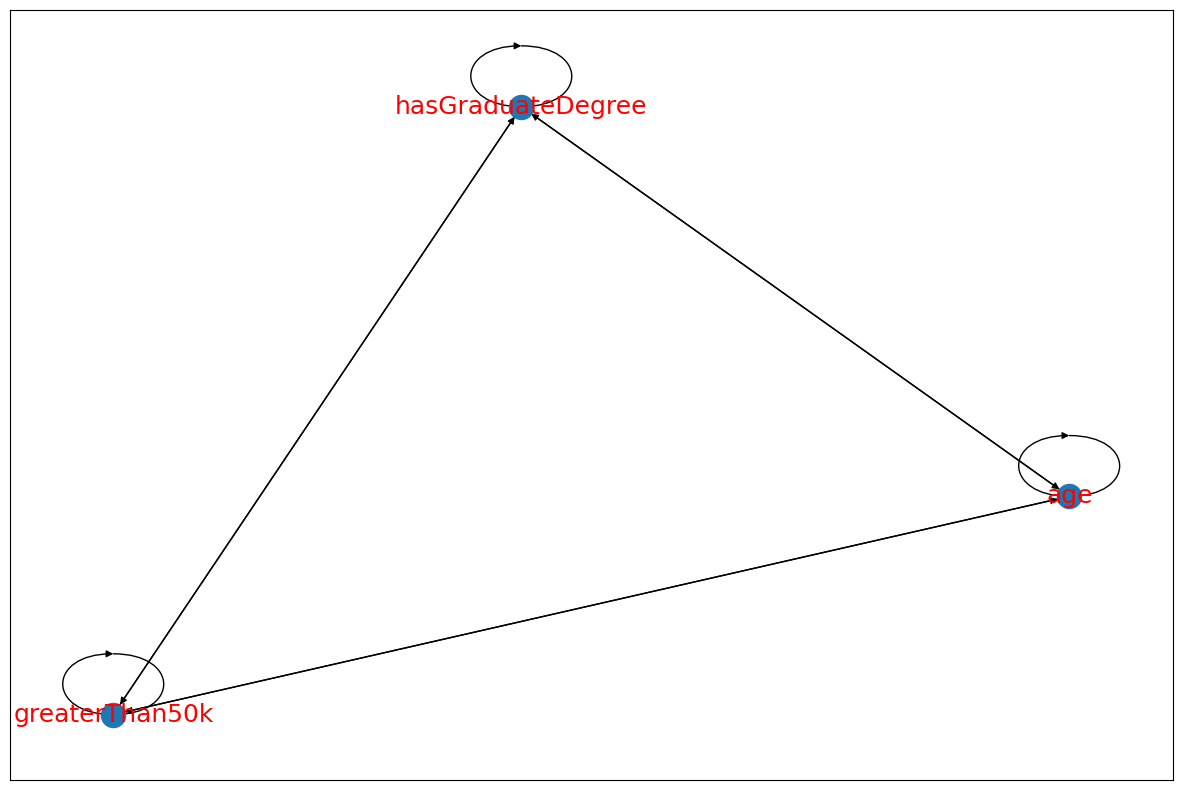

In [9]:
glasso = cdt.independence.graph.Glasso()

skeleton = glasso.predict(df)

fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton,font_size=18,font_color='r')

## Use PC algorithm for causal discovery

In [ ]:
!pip install pcalg kpcalg

In [24]:
import pcalg

In [ ]:
model_pc = cdt.causality.graph.LiNGAM()

graph_pc = model_pc.predict(df,skeleton)

fig = plt.figure(figsize=(15,10))

nx.draw_networkx(graph_pc,font_size=18,font_color='r')

In [ ]:
A_pc = nx.adjacency_matrix(graph_pc).todense()